## Data Reading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_mentah = pd.read_csv('data_mentah.csv')
data_group = pd.read_csv('data_group.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_mentah = '/content/drive/My Drive/[Distinct Team]/Dataset/data_mentah.csv'
data_group = '/content/drive/My Drive/[Distinct Team]/Dataset/data_group.csv'
data_mentah = pd.read_csv(data_mentah)
data_mentah = pd.DataFrame(data_mentah)

data_group = pd.read_csv(data_group)
data_group = pd.DataFrame(data_group)

In [ ]:
data_mentah

## Random Forest

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

### Data Group

In [38]:
# Memisahkan fitur (X) dan target (Y)
x1 = data_group.drop('Risk_Flag', axis=1)
y1 = data_group['Risk_Flag']

y1 = y1.astype(int)

print(x1.shape)
print(y1.shape)

(442008, 8)
(442008,)


In [40]:
# Membagi data menjadi data latih dan data uji
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Melatih model
random_forest.fit(x1_train, y1_train)

RandomForestClassifier(random_state=42)

In [45]:
y1_pred = random_forest.predict(x1_test)

In [46]:
#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred)
recall = recall_score(y1_test, y1_pred)
f1 = f1_score(y1_test, y1_pred)
roc_auc = roc_auc_score(y1_test, y1_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Akurasi: 0.6787176760706771
Presisi: 0.6599008588156097
Recall: 0.7338868849111821
F1-Score: 0.6949301825993556
AUC-ROC: 0.6788695304911483


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melakukan cross-validation dengan 5 lipatan
scores = cross_val_score(model, x1_train, y1_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Rata-rata Akurasi:", scores.mean())

Cross-Validation Scores: [0.67153078 0.67784675 0.67508944 0.67473593 0.67739427]
Rata-rata Akurasi: 0.6753194340272832


In [48]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Daftar parameter yang akan diuji
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

# Menentukan parameter terbaik
grid_search.fit(x1_train, y1_train)

# Menampilkan parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)

# Menampilkan hasil validasi silang pada parameter terbaik
print("F1 score Terbaik:", grid_search.best_score_)

Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
F1 score Terbaik: 0.6947409443812488


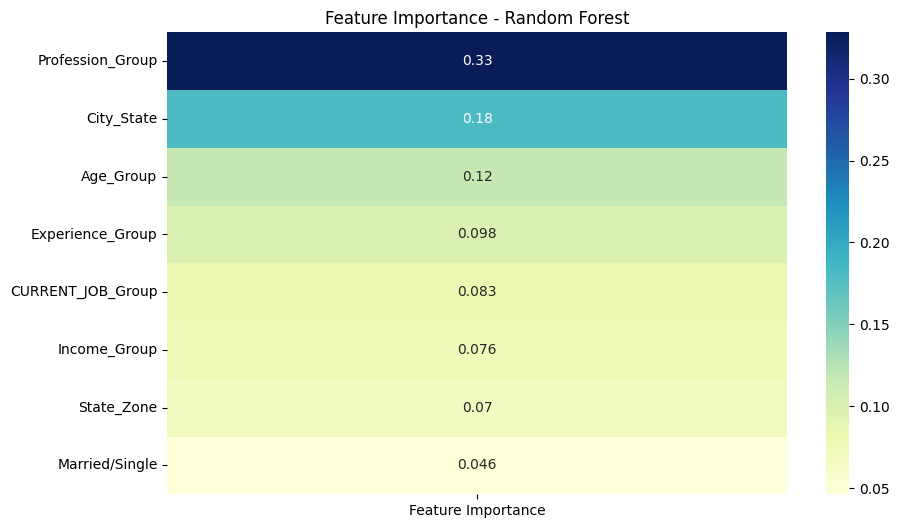

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Melatih model menggunakan data Anda
rf.fit(x1_train, y1_train)

# Mendapatkan tingkat kepentingan fitur dari model Random Forest
feature_importance = rf.feature_importances_

# Membuat DataFrame dengan tingkat kepentingan fitur untuk setiap kolom
fi_df = pd.DataFrame(feature_importance, index=x1_train.columns, columns=['Feature Importance'])

# Mengurutkan tingkat kepentingan fitur dari yang tertinggi ke terendah
fi_df = fi_df.sort_values(by='Feature Importance', ascending=False)

# Membuat heatmap untuk visualisasi tingkat kepentingan fitur
plt.figure(figsize=(10, 6))
sns.heatmap(fi_df, annot=True, cmap='YlGnBu')
plt.title('Feature Importance - Random Forest')
plt.show()

In [50]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.3 MB/s eta 0:00:00


[15:21:40] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[15:21:41] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


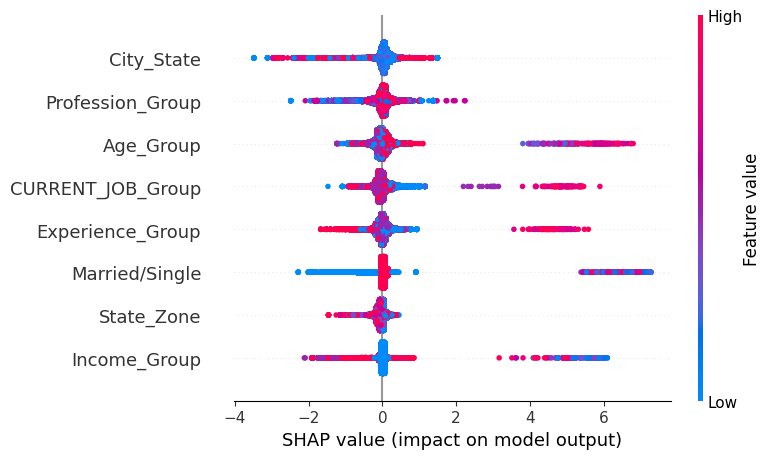

In [52]:
import shap
import xgboost

# Inisialisasi model
model_rf1 = xgboost.XGBClassifier()
model_rf1.fit(x1_train, y1_train)

explainer = shap.Explainer(model_rf1)
shap_values = explainer(x1_test)

shap.summary_plot(shap_values, x1_test)

### Data Mentah

In [53]:
#split data train & test
from sklearn.model_selection import train_test_split
X = data_mentah.drop('Risk_Flag',axis=1)
y = data_mentah['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
#Memastikan bahwa One-Hot Encoding pada data
combined_data = pd.concat([X_train, X_test])

#Menerapkan One-Hot Encoding pada combined_data
combined_data_encoded = pd.get_dummies(combined_data)

#Memisahkan kembali data pelatihan dan data pengujian setelah One-Hot Encoding
X_train_encoded = combined_data_encoded.iloc[:len(X_train)]
X_test_encoded = combined_data_encoded.iloc[len(X_train):]

In [55]:
#modelling dengan randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = model.predict(X_test_encoded)

In [57]:
#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Akurasi: 0.8985515873015874
Presisi: 0.6026287360460929
Recall: 0.5352630737246122
F1-Score: 0.5669518082493435
AUC-ROC: 0.7426355008915719


In [58]:
#Model evaluation dengan cross validation
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melakukan cross-validation dengan 5 lipatan
scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Rata-rata Akurasi:", scores.mean())

Cross-Validation Scores: [0.89910714 0.90300099 0.90019841 0.89789187 0.89952877]
Rata-rata Akurasi: 0.8999454365079365


In [59]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Daftar parameter yang akan diuji
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

# Menentukan parameter terbaik
grid_search.fit(X_train_encoded, y_train)

# Menampilkan parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)

# Menampilkan hasil validasi silang pada parameter terbaik
print("F1 score Terbaik:", grid_search.best_score_)

Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
F1 score Terbaik: 0.5685075251318994


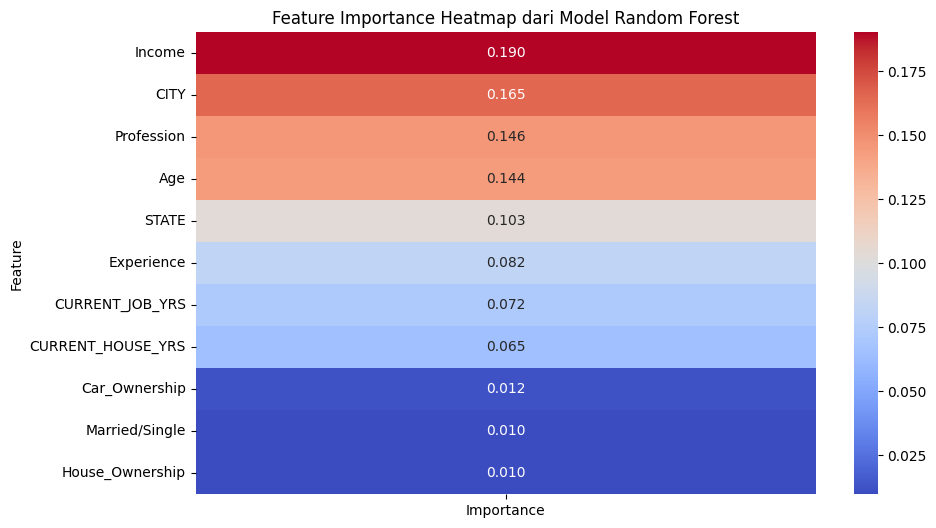

In [60]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Mengambil nilai feature importance
feature_importance = model.feature_importances_

# Mendapatkan nama-nama fitur
feature_names = X_train.columns  # Gantilah X_train dengan DataFrame Anda

# Membuat DataFrame untuk feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Mengurutkan feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mengonversi Importance ke float
feature_importance_df['Importance'] = feature_importance_df['Importance'].astype(float)

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=feature_importance_df.set_index('Feature'), annot=True, fmt='.3f', cmap='coolwarm', xticklabels=True)
plt.title('Feature Importance Heatmap dari Model Random Forest')
plt.show()

In [61]:
!pip install shap

In [62]:
import shap
import xgboost

In [63]:
# Inisialisasi model
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[15:43:18] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[15:43:19] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


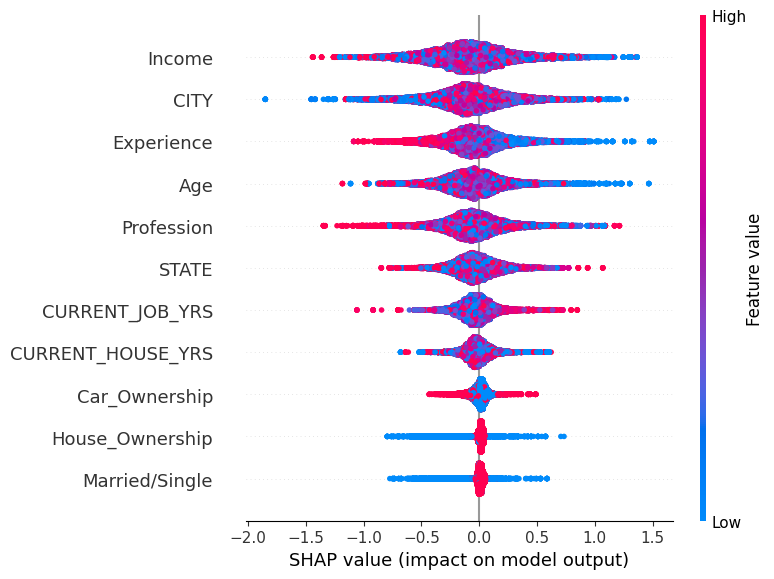

In [64]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)